In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

import xgboost as xgb

from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer

from sklearn.preprocessing import PolynomialFeatures

In [2]:
%cd C:\Users\sivas\Desktop\Hackathon\Dataset

C:\Users\sivas\Desktop\Hackathon\Dataset


In [278]:
train = pd.read_csv("Train.csv")

In [279]:
test= pd.read_csv("Test.csv")

In [280]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [281]:
train.drop(columns='Employee_ID',inplace=True)

In [282]:
empid = test.loc[:,'Employee_ID']
test.drop(columns='Employee_ID',inplace=True)

In [283]:
train.select_dtypes('O').nunique()

Gender                        2
Relationship_Status           2
Hometown                      5
Unit                         12
Decision_skill_possess        4
Compensation_and_Benefits     5
dtype: int64

In [284]:
train.Gender = train.Gender.map({'M':0,'F':1})
train.Relationship_Status = train.Relationship_Status.map({'Single':0,'Married':1})

In [285]:
test.Gender = test.Gender.map({'M':0,'F':1})
test.Relationship_Status = test.Relationship_Status.map({'Single':0,'Married':1})

In [286]:
# train = pd.get_dummies(train, columns=["Hometown"], prefix=["HT"],drop_first=True)
# train = pd.get_dummies(train, columns=["Unit"],drop_first=True)

# train = pd.get_dummies(train, columns=["Decision_skill_possess"],drop_first=True)
# train = pd.get_dummies(train, columns=["Compensation_and_Benefits"],drop_first=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['Hometown'] = le.fit_transform(train['Hometown'])
train['Hometown'] = le.fit_transform(train['Hometown'])
train['Unit'] = le.fit_transform(train['Unit'])
train['Decision_skill_possess'] = le.fit_transform(train['Decision_skill_possess'])
train['Compensation_and_Benefits'] = le.fit_transform(train['Compensation_and_Benefits'])

In [287]:
# test = pd.get_dummies(test, columns=["Hometown"], prefix=["HT"],drop_first=True)
# test = pd.get_dummies(test, columns=["Unit"],drop_first=True)

# test = pd.get_dummies(test, columns=["Decision_skill_possess"],drop_first=True)
# test = pd.get_dummies(test, columns=["Compensation_and_Benefits"],drop_first=True)

test['Hometown'] = le.fit_transform(test['Hometown'])
test['Unit'] = le.fit_transform(test['Unit'])
test['Decision_skill_possess'] = le.fit_transform(test['Decision_skill_possess'])
test['Compensation_and_Benefits'] = le.fit_transform(test['Compensation_and_Benefits'])

In [14]:
# train.select_dtypes('O').nunique()

In [16]:
# test.select_dtypes('O').nunique()

In [288]:
train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,1,42.0,4,1,1,2,2,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,0,24.0,3,0,3,3,0,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,1,58.0,3,1,0,8,2,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,1,26.0,3,0,2,1,1,4.0,3,56,...,2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,1,31.0,1,1,3,3,2,5.0,4,62,...,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [394]:
# train.info()

In [289]:
train.isna().sum().sort_values(ascending=False)[:10]

VAR4                    656
VAR2                    577
Age                     412
Time_of_service         144
Work_Life_balance        11
Pay_Scale                 9
Attrition_rate            0
Time_since_promotion      0
Education_Level           0
Relationship_Status       0
dtype: int64

In [290]:
percent_missing = train.isnull().sum() * 100 / len(train)
pd.DataFrame({'Count': train.isnull().sum(),'Percent': percent_missing}).sort_values(by='Percent',ascending=False)[:10]

,Count,Percent
VAR4,656,9.371429
VAR2,577,8.242857
Age,412,5.885714
Time_of_service,144,2.057143
Work_Life_balance,11,0.157143
Pay_Scale,9,0.128571
Gender,0,0.000000
Compensation_and_Benefits,0,0.000000
VAR7,0,0.000000
VAR6,0,0.000000


In [35]:
# columns = train.columns

In [291]:
percent_missing = test.isnull().sum() * 100 / len(test)
pd.DataFrame({'Count': test.isnull().sum(),'Percent': percent_missing}).sort_values(by='Percent',ascending=False)[:10]

,Count,Percent
VAR4,298,9.933333
VAR2,217,7.233333
Age,161,5.366667
Time_of_service,52,1.733333
Work_Life_balance,5,0.166667
Pay_Scale,3,0.100000
Gender,0,0.000000
VAR6,0,0.000000
VAR5,0,0.000000
VAR3,0,0.000000


## Train Test Split

In [301]:
X = train.loc[:,train.columns != 'Attrition_rate']
y = train.loc[:,'Attrition_rate']

In [302]:
X.shape,y.shape

((7000, 21), (7000,))

## Correlation

In [122]:
def heatmap(dataset):
    plt.figure(figsize=(45,40))
    plt.rcParams.update({'font.size': 10})
    matrix = np.triu(dataset.corr())
    sns.heatmap(dataset.corr(),annot=True,cmap = 'coolwarm',mask=matrix)

In [276]:
# heatmap(X)

In [275]:
# heatmap(test)

In [303]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    print(col_corr)

In [304]:
correlation(X,0.8)

set()


In [305]:
correlation(test,0.8)

set()


## Dealing With Missing Values

In [335]:
# train.loc[train.Gender == 1,['Gender','Age']].mean()
# train.groupby('Gender')['Age'].transform('mean')

# train['Age'] = train['Age'].fillna(train.groupby('Gender')['Age'].transform('mean'))

In [336]:
# test['Age'] = test['Age'].fillna(train.groupby('Gender')['Age'].transform('mean'))
# test['Age'] = test['Age'].fillna(test.groupby('Gender')['Age'].transform('mean'))

In [337]:
# train.fillna(train.mean(),inplace=True)
# test.fillna(train.mean(),inplace=True)
# test.fillna(test.mean(),inplace=True)

In [306]:
X.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_since_promotion', 'growth_rate',
       'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')

In [307]:
imputer = KNNImputer(n_neighbors=3)

X_imputer = imputer.fit_transform(X)

In [308]:
test_imputer = imputer.fit_transform(test)

In [309]:
X_imputer_df = pd.DataFrame(X_imputer,columns=X.columns)

In [310]:
test_imputer_df = pd.DataFrame(test_imputer,columns=X.columns)

In [498]:
# imputer = IterativeImputer(RandomForestRegressor(n_estimators=10))
# train_iterative = imputer.fit_transform(X)
# test_iterative = imputer.fit_transform(test)

In [499]:
# train_iter = pd.DataFrame(data=train_iterative,columns=X.columns)
# test_iter = pd.DataFrame(data=test_iterative,columns=test.columns)

In [447]:
# train_iter

In [311]:
X_imputer_df.isna().sum().sort_values(ascending=False)[:10]

VAR7                      0
Travel_Rate               0
Age                       0
Education_Level           0
Relationship_Status       0
Hometown                  0
Unit                      0
Decision_skill_possess    0
Time_since_promotion      0
growth_rate               0
dtype: int64

In [312]:
test_imputer_df.isna().sum().sort_values(ascending=False)[:10]

VAR7                      0
Travel_Rate               0
Age                       0
Education_Level           0
Relationship_Status       0
Hometown                  0
Unit                      0
Decision_skill_possess    0
Time_since_promotion      0
growth_rate               0
dtype: int64

In [313]:
X_imputer_df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,1.0,42.0,4.0,1.0,1.0,2.0,2.0,4.0,33.0,1.0,...,7.0,2.0,3.0,4.0,0.7516,1.8688,2.000000,4.0,5.0,3.0
1,0.0,24.0,3.0,0.0,3.0,3.0,0.0,4.0,36.0,0.0,...,6.0,2.0,4.0,3.0,-0.9612,-0.4537,2.000000,3.0,5.0,3.0
2,1.0,58.0,3.0,1.0,0.0,8.0,2.0,3.0,51.0,0.0,...,8.0,2.0,1.0,4.0,-0.9612,-0.4537,3.000000,3.0,8.0,3.0
3,1.0,26.0,3.0,0.0,2.0,1.0,1.0,3.0,56.0,1.0,...,8.0,2.0,1.0,3.0,-1.8176,-0.4537,1.666667,3.0,7.0,3.0
4,1.0,31.0,1.0,1.0,3.0,3.0,2.0,4.0,62.0,1.0,...,2.0,3.0,3.0,1.0,0.7516,-0.4537,2.000000,2.0,8.0,2.0


In [240]:
import scipy.stats as sts
for i in range(len(X_imputer_df.columns)):
    index = X_imputer_df.loc[np.abs(sts.zscore(X_imputer_df[X_imputer_df.columns[i]],nan_policy='omit')) > 3,X_imputer_df.columns[i]].index
    X_imputer_df[X_imputer_df.columns[i]][index] = X_imputer_df[X_imputer_df.columns[i]].median() 

In [108]:
# X_imputer_df.describe().T

In [67]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=1)
# df_ind_iter['FR_3M_Re'] = pca.fit_transform(df_ind_iter[['fund_return_3months','return_ytd']])
# df_ind_iter.drop(columns=['fund_return_3months','return_ytd'],inplace=True)

In [314]:
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
# scaler = StandardScaler()
train_iter_scale = scaler.fit_transform(X_imputer_df)
test_iter_scale = scaler.transform(test_imputer_df)


# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

## feature selection

In [249]:
re = RandomForestRegressor()
re.fit(train_iter_scale, y)

RandomForestRegressor()

In [250]:
re.feature_importances_

array([0.01307591, 0.08749334, 0.04195568, 0.01510558, 0.04280446,
       0.06157219, 0.03334785, 0.07739919, 0.03597352, 0.11390966,
       0.0253909 , 0.04302255, 0.06148232, 0.02981365, 0.03926886,
       0.04031831, 0.04949517, 0.03719072, 0.02744959, 0.03961626,
       0.04449217, 0.03982212])

In [252]:
pd.DataFrame({'Columns':X.columns,'Imp_Features':re.feature_importances_}).sort_values(by='Imp_Features',ascending=False)[:10]

,Columns,Imp_Features
9,growth_rate,0.113910
1,Age,0.087493
7,Time_of_service,0.077399
5,Unit,0.061572
12,Pay_Scale,0.061482
16,VAR2,0.049495
20,VAR6,0.044492
11,Post_Level,0.043023
4,Hometown,0.042804
2,Education_Level,0.041956


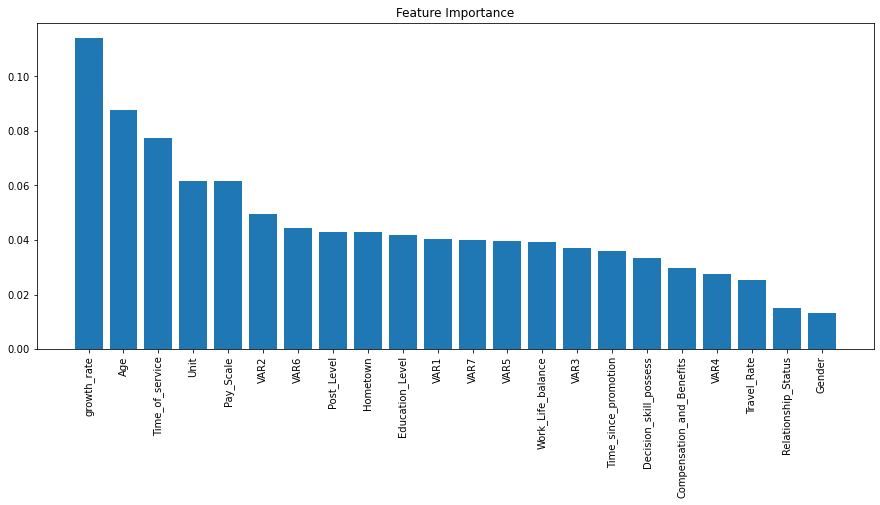

In [253]:
importances = re.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure(figsize=(15,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [255]:
print(len(names))
names

22


['growth_rate',
 'Age',
 'Time_of_service',
 'Unit',
 'Pay_Scale',
 'VAR2',
 'VAR6',
 'Post_Level',
 'Hometown',
 'Education_Level',
 'VAR1',
 'VAR7',
 'VAR5',
 'Work_Life_balance',
 'VAR3',
 'Time_since_promotion',
 'Decision_skill_possess',
 'Compensation_and_Benefits',
 'VAR4',
 'Travel_Rate',
 'Relationship_Status',
 'Gender']

In [55]:
from sklearn.feature_selection import RFE
estimator = RandomForestRegressor()
selector = RFE(estimator)
selector = selector.fit(train_iter_scale, y)
selector.support_

array([False,  True,  True, False,  True,  True, False,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
       False,  True,  True, False])

In [56]:
imp_features = []
for bol,col in zip(selector.support_,X.columns):
    if bol:
        imp_features.append(col)

In [57]:
imp_features

['Age',
 'Education_Level',
 'Hometown',
 'Unit',
 'Time_of_service',
 'growth_rate',
 'Post_Level',
 'Pay_Scale',
 'VAR2',
 'VAR5',
 'VAR6']

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
select_univariate = SelectKBest(f_regression, k=20).fit(train_iter_scale, y)

In [59]:
feature_mask = select_univariate.get_support()
feature_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True])

In [60]:
imp_features_Kbest = []
for bol,col in zip(feature_mask,X.columns):
    if bol:
        imp_features_Kbest.append(col)

In [61]:
imp_features_Kbest

['Gender',
 'Age',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR4',
 'VAR5',
 'VAR7']

## Modeling

In [315]:
X_feat = pd.DataFrame(data=train_iter_scale,columns=X.columns)
# X_feat = X_imputer_df.loc[:,names[:15]]

In [316]:
test_feat = pd.DataFrame(data=test_iter_scale,columns=X.columns)
# test_feat = test_data.loc[:,names[:15]]

In [168]:
# X_data['Unit_R&D'].nunique()

In [243]:
poly = PolynomialFeatures(2)
polyXtrain = poly.fit_transform(X_feat)
polyXtest = poly.transform(test_feat)

In [244]:
polyXtrain.shape

(7000, 276)

In [317]:
# rr = RandomForestRegressor(n_estimators=900,random_state = 4)
# rr.fit(X_feat, y)

gb_clf2 = GradientBoostingRegressor(n_estimators=5, random_state=3)
gb_clf2.fit(X_feat, y)


# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 500)
# xg_reg.fit(X, y)

# model = CatBoostRegressor(n_estimators =2500,verbose=False)
# model.fit(X, y)

# model = LGBMRegressor(n_estimators=2)
# model.fit(X, y)

GradientBoostingRegressor(n_estimators=5, random_state=3)

In [318]:
# out = gb_clf2.predict(test_feat)

# out = rr.predict(test_feat)

# preds = xg_reg.predict(test)
# preds
# out = boost.predict(test)


# out=model.predict(test)


out=gb_clf2.predict(test_feat)

out


array([0.18757898, 0.19256595, 0.19277495, ..., 0.19151877, 0.1858884 ,
       0.18893828])

In [319]:
# input_ = empid.loc[:,'Employee_ID']
final_out = pd.DataFrame({'Employee_ID':empid,'Attrition_rate':out})
final_out.reset_index(drop=True,inplace=True)
final_out.to_csv('Final_result.csv',index=False)